# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Configuration" data-toc-modified-id="Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration</a></div><div class="lev1 toc-item"><a href="#Description-of-the-issue" data-toc-modified-id="Description-of-the-issue-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Description of the issue</a></div><div class="lev2 toc-item"><a href="#A-good-track" data-toc-modified-id="A-good-track-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A good track</a></div><div class="lev2 toc-item"><a href="#A-problematic-track" data-toc-modified-id="A-problematic-track-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>A problematic track</a></div><div class="lev2 toc-item"><a href="#A-problematic-track-as-a-custom-track" data-toc-modified-id="A-problematic-track-as-a-custom-track-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>A problematic track as a custom track</a></div>

# Configuration

In [1]:
%pylab inline

# load python packages
import os
import os.path
import pandas as pd
import glob
from IPython.core.display import Image
from scipy import stats
import seaborn as sns

# matplotlib options
plt.rcParams['font.size'] = 20 
plt.rcParams['font.weight'] = 'medium' 
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.sans-serif'] = 'Arial' 
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# seaborn options
sns.set_context("talk", font_scale = 1.5)
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [2]:
project = 'misc'
analysis = '2017-06-19_ucsc_genome_browser_track_hub_negate_values'
PROJECT = '/Volumes/users-GR-mb-jquilez/projects/%s' % project
ANALYSIS = '%s/analysis/%s' % (PROJECT, analysis)

# Description of the issue

François and Ruggero noted that some stranded RNA-seq samples were displayed in the Track Hub of the lab as if only having reads aligned to one of the strands. Here I describe what I found.

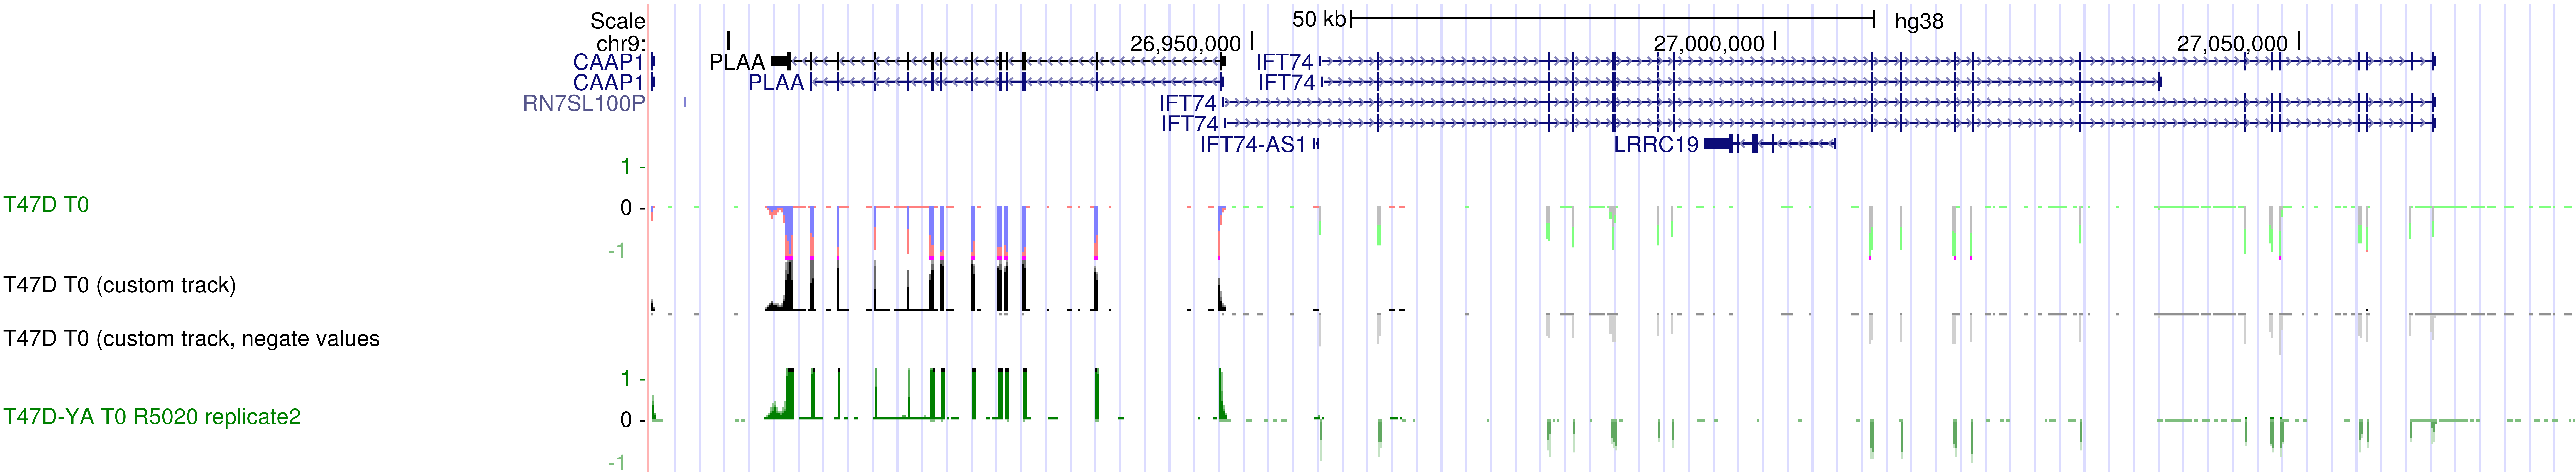

In [12]:
name = 'ucsc_genome_browser_snapshot'
labels = (ANALYSIS, name)
infile = '%s/figures/%s.png' % labels
Image(filename = infile, width = 2000)

*Note: although no y-axis ticks are shown for the black tracks:*
- `T47D T0 (custom track)` goes from 0 to 1
- `T47D T0 (custom track, negate values)` goes from -1 to 0


## A good track

In the plot above, the track `T47D-YA T0 R5020 replicate2` displays appropriately data for an stranded RNA-seq sample: reads aligned to a gene in the sense and reverse strand have negative values and positive values, respectively. This track was defined in a UCSC Genome Browser Track Hub with:

```
        track rz_005_02_01_rnaseq_profile
        parent rnaseq_profiles
        container multiWig
        shortLabel T47D-YA T0 R5020 replicate2
        longLabel T47D-YA T0 R5020 replicate2 (rz_005_02_01_rnaseq) RPM profile
        type bigWig
        visibility full
        autoscale off
        alwaysZero on
        viewLimits -1.0:1.0
        aggregate transparentOverlay
        showSubtrackColorOnUi on
        maxHeightPixels 100:50:10
        color 0,128,0
        priority 6

                track rz_005_02_01_rnaseq_profile_strand1
                parent rz_005_02_01_rnaseq_profile
                bigDataUrl <a_path>/rz_005_02_01_rnaseq_unique_multiple_strand1_rpm.bw
                type bigWig
                color 0,128,0

                track rz_005_02_01_rnaseq_profile_strand2
                parent rz_005_02_01_rnaseq_profile
                bigDataUrl <a_path>/rz_005_02_01_rnaseq_unique_multiple_strand2_rpm.bw
                type bigWig
                color 0,128,0
                negateValues on

```

## A problematic track

However, for `T47D T0` all reads displayed as negative in its track, despite being defined in the same way as the sample above. And, as far as I understand, this is not due to a wrong usage of the `negateValues=on` because the `T47D T0` track indeed displays 4 stacked tracks:
- strand1 [red]
- strand2 [green]
- strand1 (negateValues=on) [blue]
- strand2 (negateValues=on) [gray]

which were defined with:
```
        track fd_004_01_01_rnaseq_profile
        parent rnaseq_profiles
        container multiWig
        shortLabel T47D T0
        longLabel T47D T0 (fd_004_01_01_rnaseq) RPM profile
        type bigWig
        visibility full
        autoscale off
        alwaysZero on
        viewLimits -1.0:1.0
        aggregate transparentOverlay
        showSubtrackColorOnUi on
        maxHeightPixels 100:50:10
        color 0,128,0
        priority 6

                track fd_004_01_01_rnaseq_profile_strand1
                parent fd_004_01_01_rnaseq_profile
                bigDataUrl <a_path>/fd_004_01_01_rnaseq_unique_multiple_strand1_rpm.bw
                type bigWig
                color 255,0,0

                track fd_004_01_01_rnaseq_profile_strand2
                parent fd_004_01_01_rnaseq_profile
                bigDataUrl <a_path>/fd_004_01_01_rnaseq_unique_multiple_strand2_rpm.bw
                type bigWig
                color 0,255,0

                track fd_004_01_01_rnaseq_profile_strand1_negate_on
                parent fd_004_01_01_rnaseq_profile
                bigDataUrl <a_path>/fd_004_01_01_rnaseq_unique_multiple_strand1_rpm.bw
                type bigWig
                color 0,0,255
                negateValues on

                track fd_004_01_01_rnaseq_profile_strand2_negate_on
                parent fd_004_01_01_rnaseq_profile
                bigDataUrl <a_path>/fd_004_01_01_rnaseq_unique_multiple_strand2_rpm.bw
                type bigWig
                color 100,100,100
                negateValues on

```

And one can see the red-blue and green-gray overlap, meaning that `negateValues=on` has no effect on wether data are displayed in the positive or negative axis.

## A problematic track as a custom track

Moreover, when I use exactly the same 2 tracks of `T47D T0` (i.e. strand1 and strand2) to define custom tracks (in the plot above, middle tracks in black) with the code:
```
track name='T47D T0 (custom track)' type=bigWig bigDataUrl=<a_path>/fd_004_01_01_rnaseq_unique_multiple_strand1_rpm.bw visibility=2 viewLimits=-1.0:1.0 autoscale=off alwaysZero=on

track name='T47D T0 (custom track, negate values' type=bigWig bigDataUrl=<a_path>/fd_004_01_01_rnaseq_unique_multiple_strand2_rpm.bw visibility=2 negateValues=on
```

Then I see the expected display of data as positive and negative.